In [ ]:
#NOTE: THE MAJORITY OF THIS CODE COMES FROM THE CODE FOR THE TENSORFLOW TUTORIAL IN COURSE 2. IT HAS BEEN INVALUABLE IN THE CREATION OF THIS PROJECT.

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [3]:
import pandas as pd

stream_data = pd.read_csv('stream_data.csv', quotechar='"', skipinitialspace=True).values
rank_data = pd.read_csv('rank_data.csv', quotechar='"', skipinitialspace=True).values

In [4]:
n=stream_data.shape[0]
d=stream_data.shape[1]

X=[]
Y=[]

for i in range(n):
    print(i)
    for j in range(3,d):
        if(d>= j+37):
            if(np.sum([np.isnan(x) for x in stream_data[i][j:(j+30)]]) == 0):
                x_data = []
                x_data.extend(stream_data[i][j:(j+30)])
                x_data.extend(rank_data[i][j:(j+30)])
                x_data.extend([(1.0 if stream_data[i][j+k+1]>stream_data[i][j+k] else 0.0) for k in range(29)])
                x_data.extend([(1.0 if rank_data[i][j+k+1]>rank_data[i][j+k] else 0.0) for k in range(29)])
                day = np.zeros(6)
                if(j%7 < 6):
                    day[j%7] = 1.0
                x_data.extend(day)
                
                y_data=[]
                y_data.extend(stream_data[i][(j+30):(j+37)])
                
                if(all(isinstance(item, float) for item in y_data)):
                    if(np.sum(np.isnan(y_data))==0):
                        X.append(x_data)
                        Y.append(y_data)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965


In [19]:
X = np.asarray(X)
Y = np.asarray(Y)

s = np.arange(X.shape[0])
np.random.shuffle(s)

X = X[s]
Y = Y[s]

m = X.shape[0]

cutoff = np.floor(m*4/5)

X_train = X[:cutoff]
Y_train = Y[:cutoff]
X_test = X[cutoff:]
Y_test = Y[cutoff:]

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [21]:
# GRADED FUNCTION: cost

def cost(logits, actual):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (predicted number of streams)
    actual -- vector containing actual number of streams
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ### START CODE HERE ### 
    
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)
    z = tf.placeholder(tf.float32, name = "z")
    y = tf.placeholder(tf.float32, name = "y")
    
    # Use the loss function (approx. 1 line)
    
    cost = tf.reduce_mean((z/y - 1)**2)
    
    # Create a session (approx. 1 line). See method 1 above.
    sess = tf.Session()
    
    # Run the session (approx. 1 line).
    cost = sess.run(cost, feed_dict = {z: logits, y: actual})
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return cost

In [22]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, shape=(n_x, None))
    Y = tf.placeholder(tf.float32, shape=(n_y, None))
    ### END CODE HERE ###
    
    return X, Y

In [23]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [1, 124]
                        b1 : [1, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [1,124], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [1,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1}
    
    return parameters

In [24]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z1 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)                                             
    ### END CODE HERE ###
    
    return Z1

In [32]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z1, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean((Z1/Y - 1)**2)
    ### END CODE HERE ###
    
    return cost

In [33]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z1 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z1, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        
        return parameters

Cost after epoch 0: 0.778391
Cost after epoch 10: 0.020180
Cost after epoch 20: 0.011373
Cost after epoch 30: 0.004982
Cost after epoch 40: 0.003582
Cost after epoch 50: 0.003129
Cost after epoch 60: 0.002885
Cost after epoch 70: 0.002749
Cost after epoch 80: 0.002643
Cost after epoch 90: 0.002575
Cost after epoch 100: 0.002519
Cost after epoch 110: 0.002485
Cost after epoch 120: 0.002443
Cost after epoch 130: 0.002424
Cost after epoch 140: 0.002403
Cost after epoch 150: 0.002379
Cost after epoch 160: 0.002366
Cost after epoch 170: 0.002343
Cost after epoch 180: 0.002329
Cost after epoch 190: 0.002321
Cost after epoch 200: 0.002318
Cost after epoch 210: 0.002305
Cost after epoch 220: 0.002291
Cost after epoch 230: 0.002287
Cost after epoch 240: 0.002289
Cost after epoch 250: 0.002271
Cost after epoch 260: 0.002268
Cost after epoch 270: 0.002265
Cost after epoch 280: 0.002268
Cost after epoch 290: 0.002263


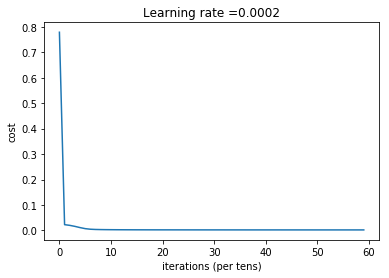

Parameters have been trained!


In [35]:
parameters = model(X_train.T, np.matrix(Y_train[:,0]), X_test.T, np.matrix(Y_test[:,0]),learning_rate = 0.0002,minibatch_size = 100,num_epochs = 300)

In [37]:
W1 = parameters['W1']
b1 = parameters['b1']

Y_hat = (W1.dot(X_test.T) + b1)

In [43]:
np.mean((np.abs(np.matrix(Y_test[:,0]) - Y_hat)))

11082.048928387019